In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.path.abspath(''))  

/home/jakkerman/MSc_CLS/DSK_model_MScThesis/plotting


In [3]:
seed = 1234

In [4]:
filename = f'../results/result_data/agent_data_{seed}.csv'
df_agent = pd.read_csv(filename, index_col='step')
df_agent.head()

""
step
0
1
2
3
4


NameError: name 'df' is not defined

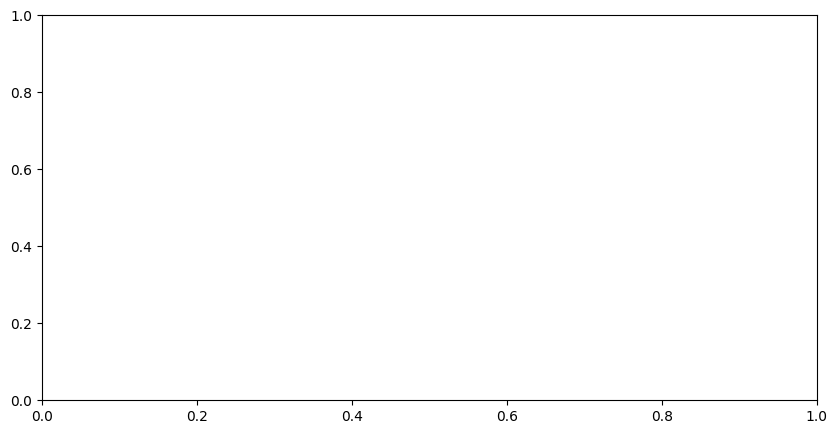

In [5]:
fig = plt.subplots(figsize=(10, 5))

for I_cat in ['labor_I', 'capital_I', 'UB_I', 'socben_I']:

    # Gather data
    I_mean = df[f'mean_{I_cat}_hh'].to_numpy()
    I_std = df[f'std_{I_cat}_hh'].to_numpy()

    # Plot mean and std
    plt.plot(I_mean, label=I_cat)
    plt.fill_between(df.index.to_numpy(), I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.title('Household Income')
plt.legend()
plt.show()

# model data

In [13]:
filename = f'../results/result_data/model_data_{seed}.csv'
df_model = pd.read_csv(filename)
df_model.head()

,CPI_cp,CPI_kp,D_ep,EI_avg,Exp_UB,GDP,GDP_cp,GDP_growth,GDP_hh,GDP_kp,...,total_Q_growth,total_Q_kp,total_w,unsat_L_demand,unsat_demand,unsat_invest,unspend_C,w_avg,w_req_avg,w_sat_avg
0,100.000000,100.000000,202831.838568,0.0,33985.0,336343.805655,93212.127614,0.000000,262241.197449,-19109.519408,...,0.000000,3250.0,304341.596599,-0.727630,0.560572,0.000000,0.454107,1.397468,1.320247,1.289835
1,114.405580,142.640770,270883.171184,0.0,29540.0,479804.499842,47801.127956,0.000000,371144.430772,60858.941114,...,0.000000,74225.0,303858.837360,0.009936,0.657556,0.629708,0.527617,1.525779,1.312120,1.285093
2,154.167358,126.648914,316342.695209,0.0,22715.0,672702.263883,212718.110814,0.000000,400876.667503,59107.485567,...,0.000000,96450.0,314561.399066,0.058280,0.633343,0.393014,0.343386,1.515466,1.309652,1.280596
3,168.863376,124.984075,336575.114311,0.0,15855.0,821033.592177,301722.516119,44.557964,473523.699652,45787.376405,...,0.661254,89050.0,331377.867492,0.116858,0.562972,0.118535,0.174931,1.429877,1.307624,1.276597
4,161.391177,123.419682,330524.443804,0.0,11900.0,820775.279076,299059.515955,21.262738,514067.594382,7648.168739,...,0.222654,50100.0,339709.009073,0.094195,0.426324,0.019090,0.041562,1.370919,1.305659,1.274141


In [14]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as smt

In [15]:
# Set parameters for bandpass filters
bk_low = 18
bk_high = 96
bk_K = 36

In [16]:
def plot_ccf(x, y):
    x_filtered = sm.tsa.filters.bkfilter(x[300:], bk_low, bk_high, bk_K)
    y_filtered = sm.tsa.filters.bkfilter(y[300:], bk_low, bk_high, bk_K)

    ccf_back = smt.ccf(x_filtered[::-1], y_filtered[::-1])[1:10][::-1]
    ccf_forw = smt.ccf(x_filtered, y_filtered)[:10]

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3))

    ax1.plot(np.concatenate((ccf_back, ccf_forw)))
    ax1.set_xticks(np.arange(19, step=3), np.arange(-9, 10, step=3))
    ax1.axhline(0, color='black', linestyle='dashed')

    ax2.plot(x_filtered)
    ax2.plot(y_filtered)
    
    plt.tight_layout()
    plt.show()

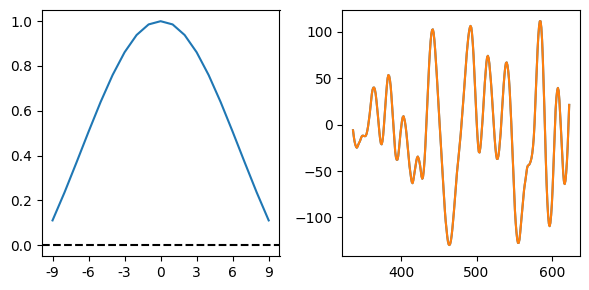

In [17]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.GDP / df_model.CPI_cp
plot_ccf(x, x)

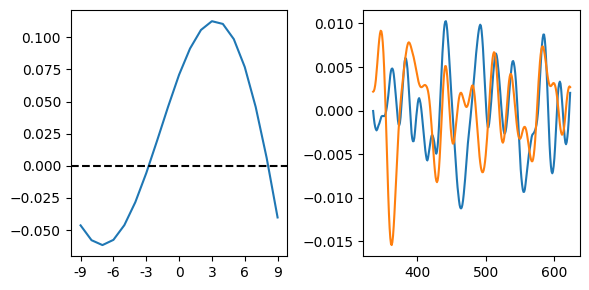

In [18]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.w_avg
plot_ccf(np.log(x), y)

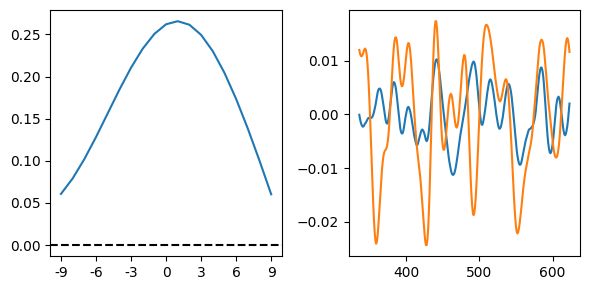

In [19]:
x = df_model.GDP / df_model.CPI_cp
y = 100 * df_model.w_avg / df_model.CPI_cp
plot_ccf(np.log(x), y)